**1. Import Necessary Libraries**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math

**2. To read the data into Python.**

In [19]:
college = pd.read_csv('error_free_college_data.csv')
print(college.head())

                        College Private  Apps  Accept  Enroll  Top10perc  \
0  Abilene Christian University     yes  1660    1232     721         23   
1            Adelphi University     yes  2186    1924     512         16   
2                Adrian College     yes  1428    1097     336         22   
3           Agnes Scott College     yes   417     349     137         60   
4     Alaska Pacific University     yes   193     146      55         16   

   Top25perc  Fundergrad  Pundergrad  Outstate  RoomBoard  Books  Personal  \
0         52        2885         537      7440       3300    450      2200   
1         29        2683        1227     12280       6450    750      1500   
2         50        1036          99     11250       3750    400      1165   
3         89         510          63     12960       5450    450       875   
4         44         249         869      7560       4120    800      1500   

   PhD  Terminal  SFRatio  percalumni  Expend  GradRate  
0   70        78

**3. Feature Engineering**

In [20]:
college['YieldRate'] = college['Enroll'] / college['Accept']
college['TotalCost'] = college['RoomBoard'] + college['Outstate']

**4. Drop Columns**

In [21]:
college = college.drop(columns=['Accept', 'Enroll', 'RoomBoard', 'Outstate', 'College', 'Apps', 'Top25perc', 'PhD'], axis=1)

print(college.columns)

Index(['Private', 'Top10perc', 'Fundergrad', 'Pundergrad', 'Books', 'Personal',
       'Terminal', 'SFRatio', 'percalumni', 'Expend', 'GradRate', 'YieldRate',
       'TotalCost'],
      dtype='object')


**5. Detect Outliers in Engineered Features**

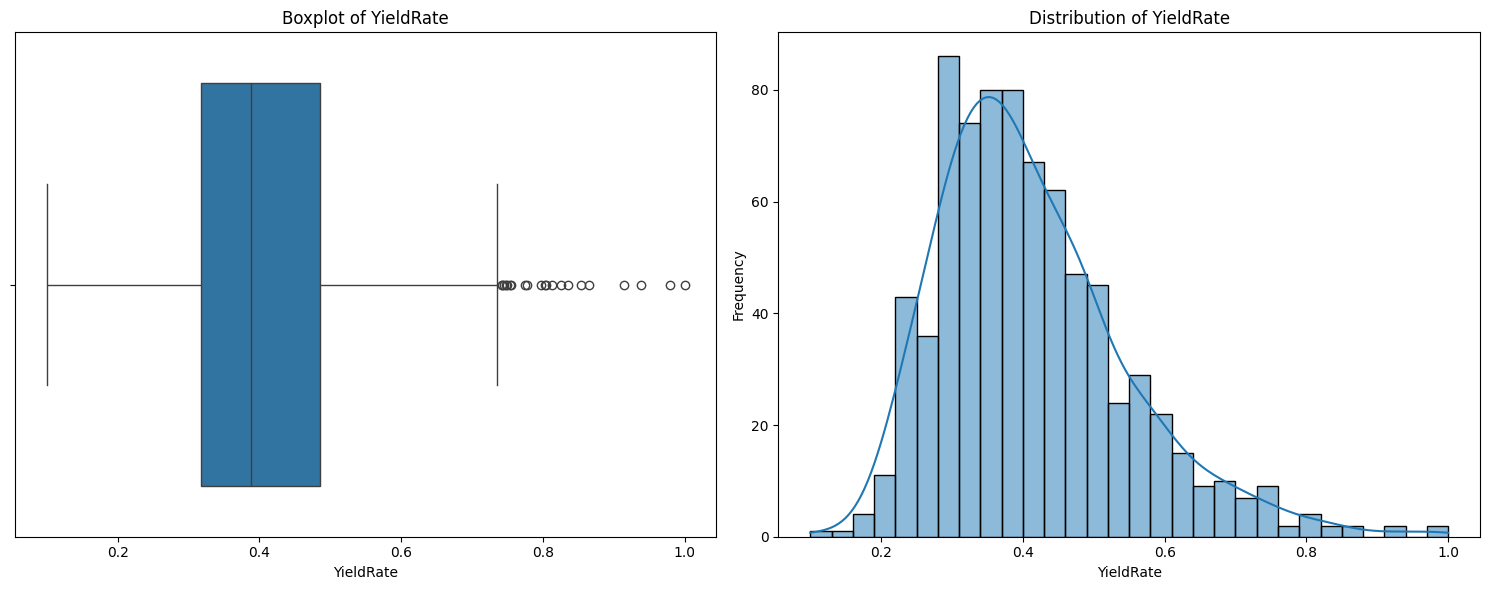

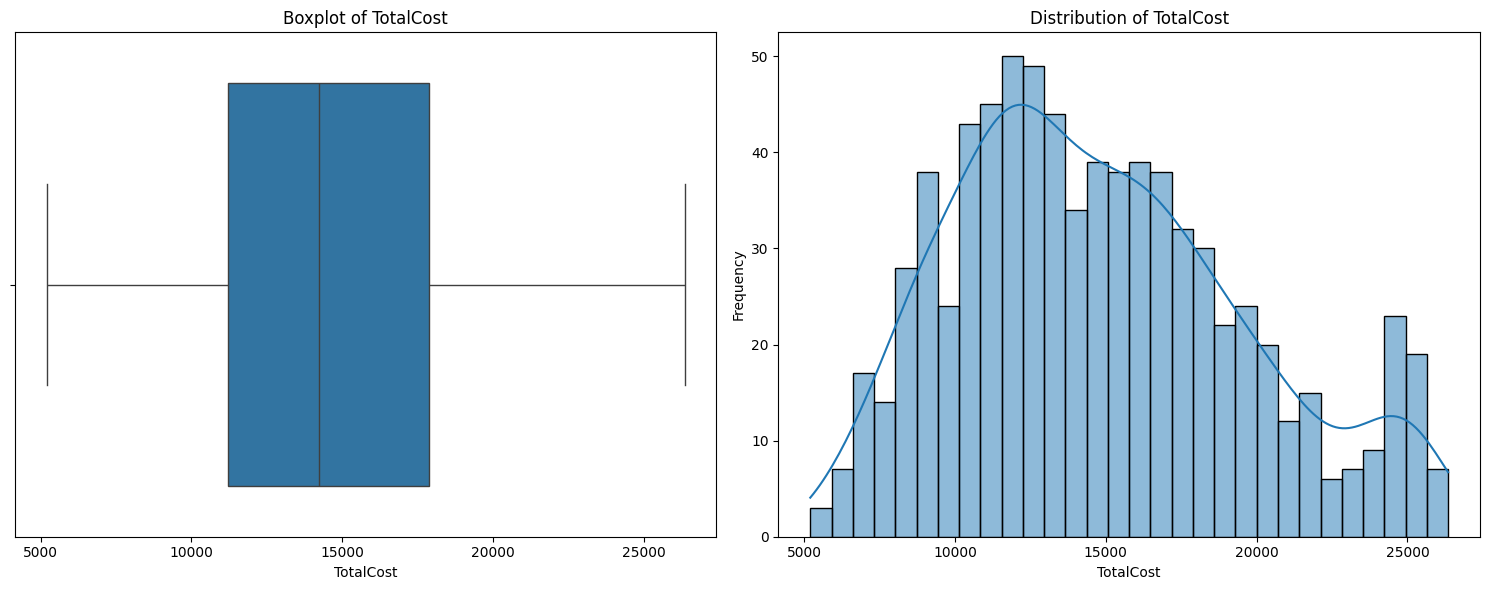

In [22]:
new_features = ['YieldRate', 'TotalCost']

for i, col in enumerate(new_features):
    fig, axes = plt.subplots(1, 2, figsize=(15, 6))

    sns.boxplot(x=college[col], ax=axes[0])
    axes[0].set_title(f'Boxplot of {col}')

    sns.histplot(college[col], kde=True, bins=30, ax=axes[1])
    axes[1].set_title(f'Distribution of {col}')
    axes[1].set_xlabel(col)
    axes[1].set_ylabel('Frequency')

    plt.tight_layout()
    plt.show()

**6. Handling Outliers of Positively Skewed Attributes**

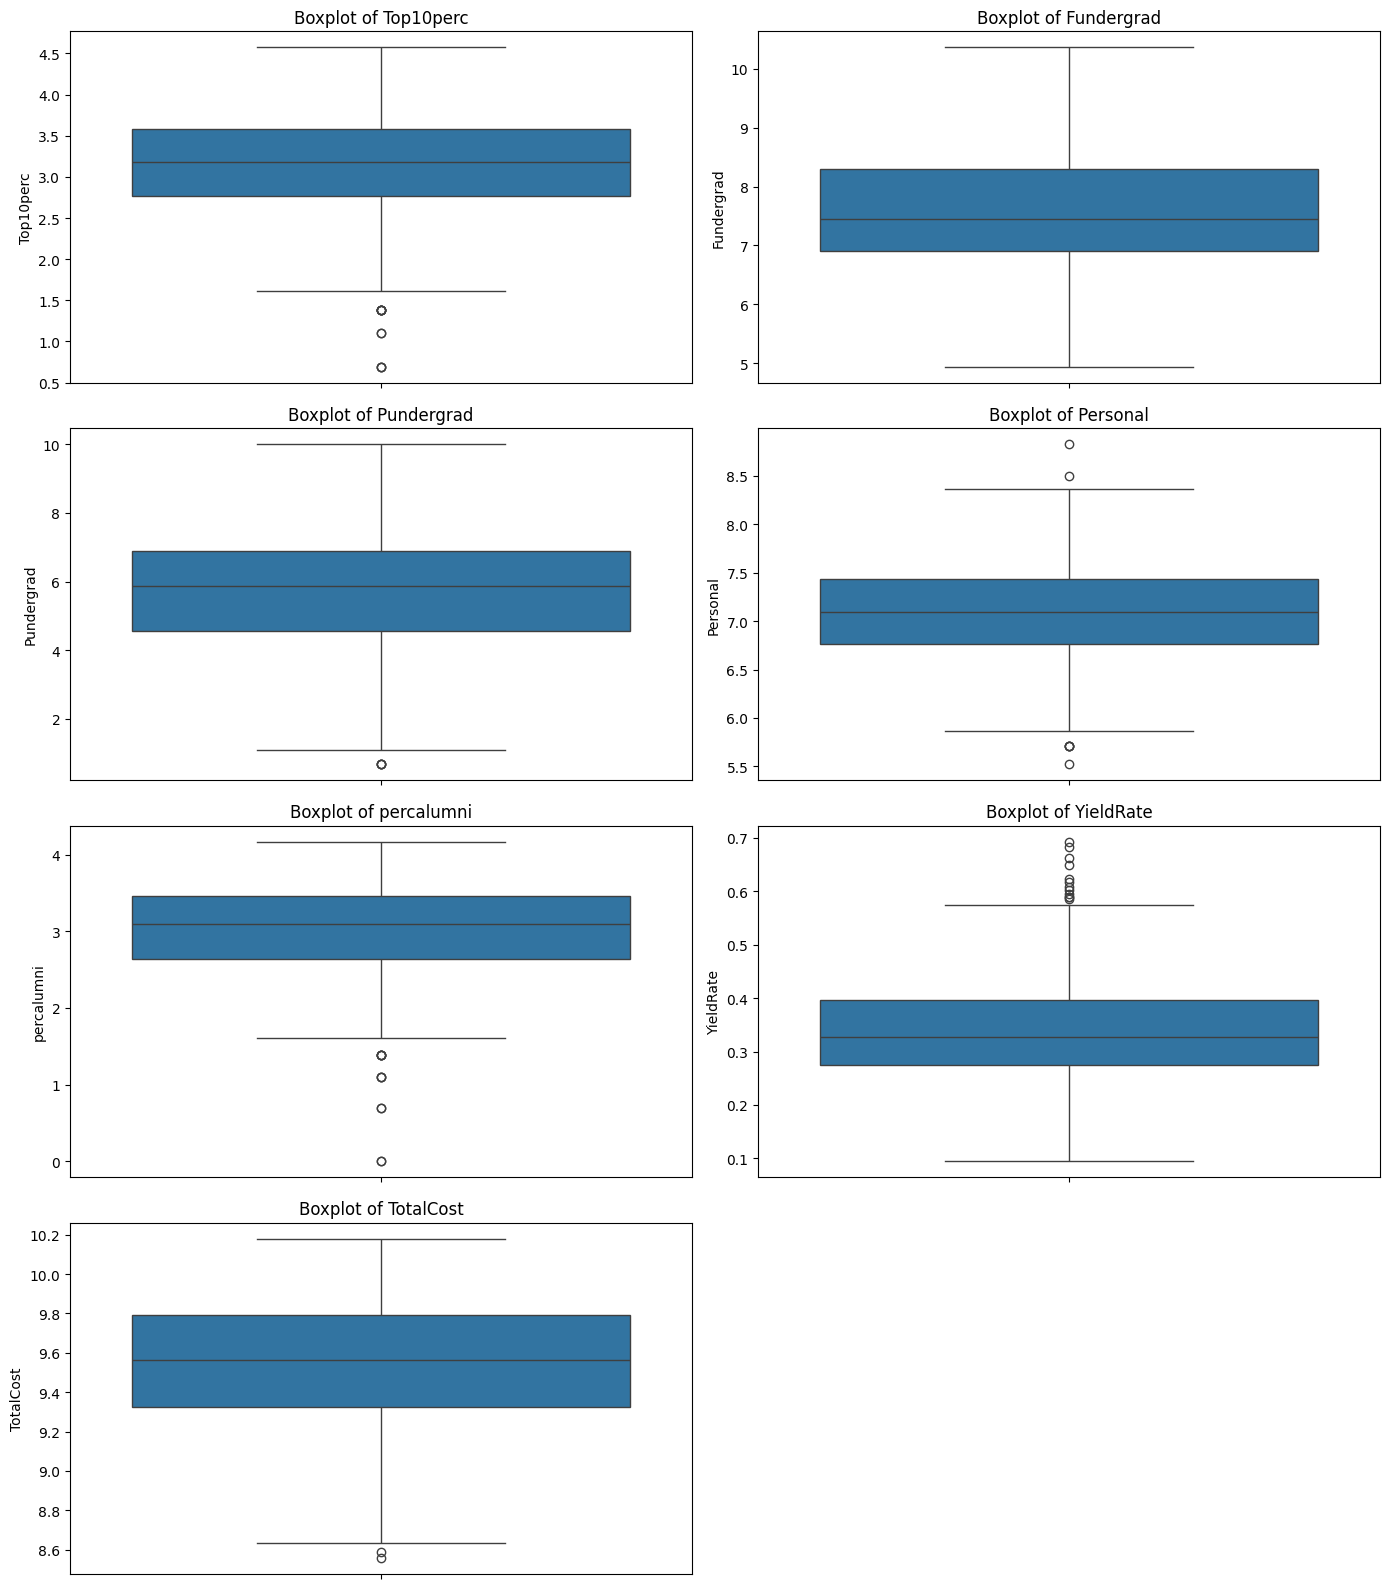

In [23]:
positively_skewed_outlier_columns = ['Top10perc', 'Fundergrad', 'Pundergrad', 'Personal', 'percalumni', 'YieldRate', 'TotalCost']

nrows = math.ceil(len(positively_skewed_outlier_columns) / 2)
plt.figure(figsize=(14, nrows * 4))

for i, col in enumerate(positively_skewed_outlier_columns):
    college[col] = np.log1p(college[col])

    plt.subplot(nrows, 2, i + 1)
    sns.boxplot(y=college[col])
    plt.title(f'Boxplot of {col}')
    plt.ylabel(col)

plt.tight_layout()
plt.show()

**7. Handling Outliers of Negatively skewed**

Expend & Books attribute are positively skewed but applying logp1 transformation didn't work well. There was lot of outliers so using yeo-johnson transformation technique.

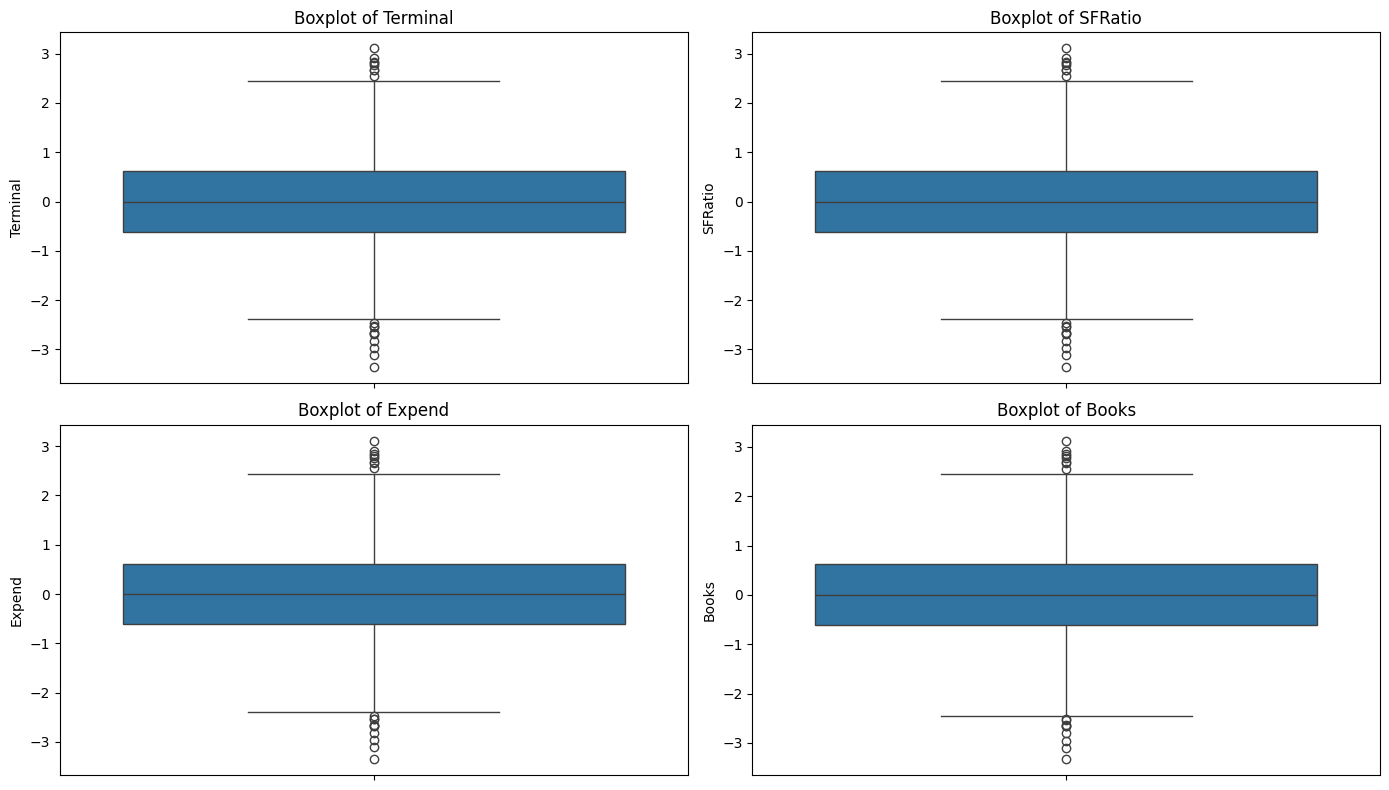

In [24]:
from sklearn.preprocessing import PowerTransformer

negatively_skewed_outlier_columns = ['Terminal', 'SFRatio', 'Expend', 'Books']

nrows = math.ceil(len(negatively_skewed_outlier_columns) / 2)
plt.figure(figsize=(14, nrows * 4))

for i, col in enumerate(negatively_skewed_outlier_columns):
    pt = PowerTransformer(method='yeo-johnson')

    # Reshape the column data for the transformer (it expects a 2D array)
    expend_reshaped = college['Expend'].values.reshape(-1, 1)
    college[col] = pt.fit_transform(expend_reshaped)

    plt.subplot(nrows, 2, i + 1)
    sns.boxplot(y=college[col])
    plt.title(f'Boxplot of {col}')
    plt.ylabel(col)

plt.tight_layout()
plt.show()

**8. Handling Outliers that aren't resolved using Capping**

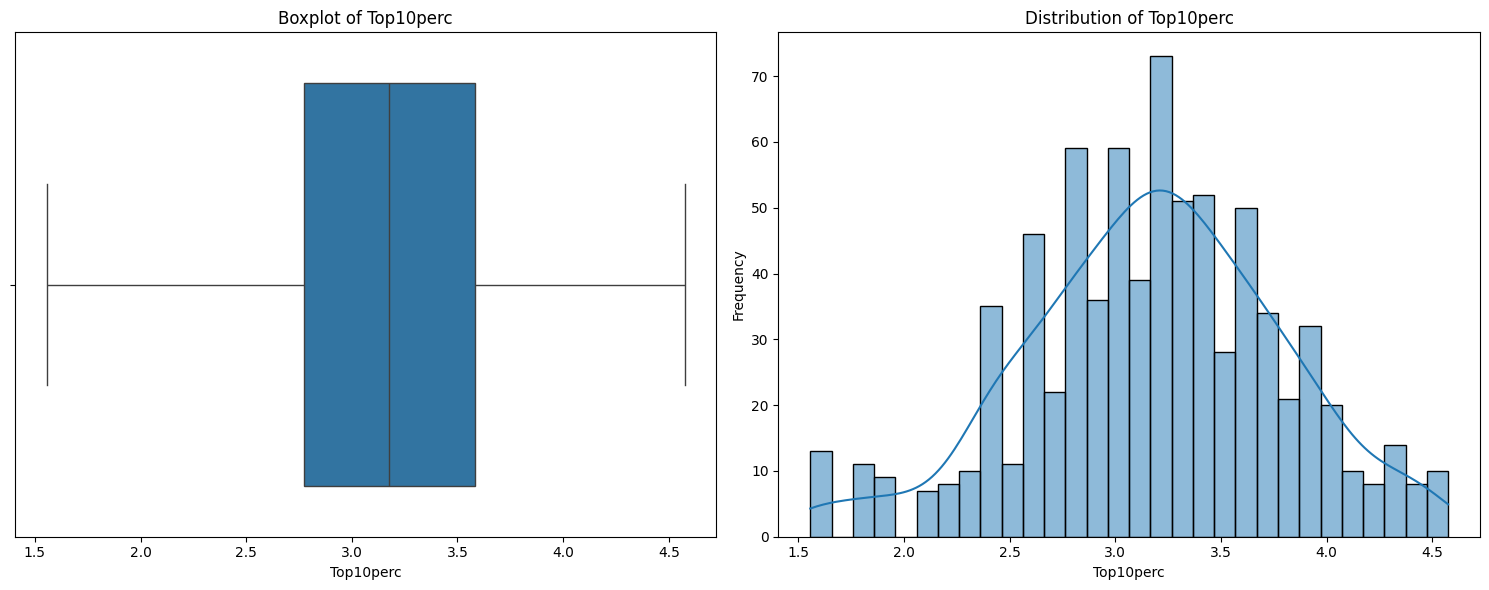

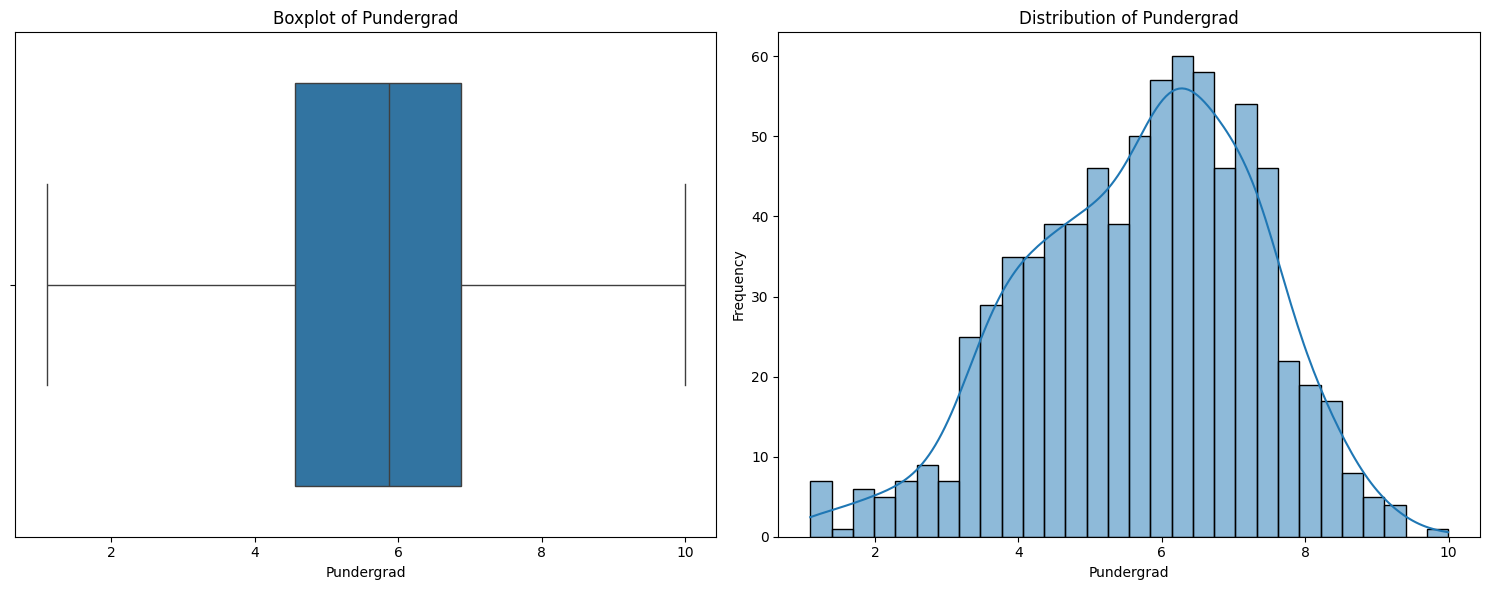

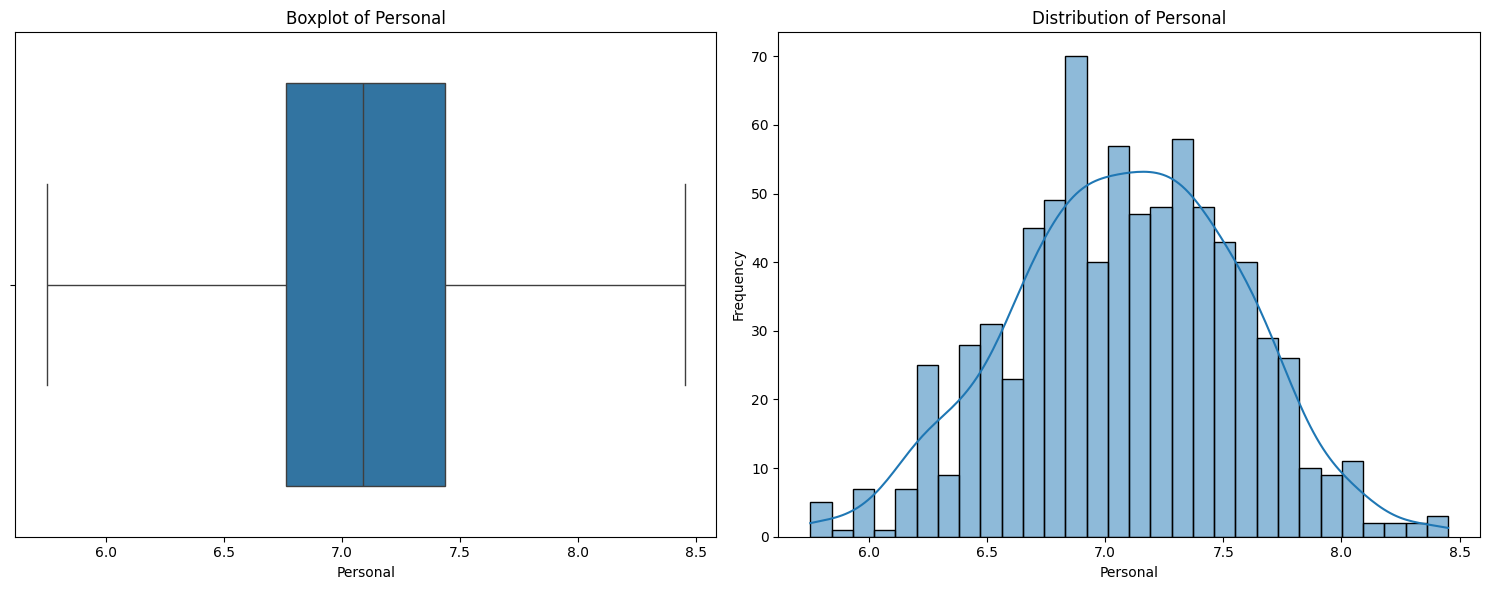

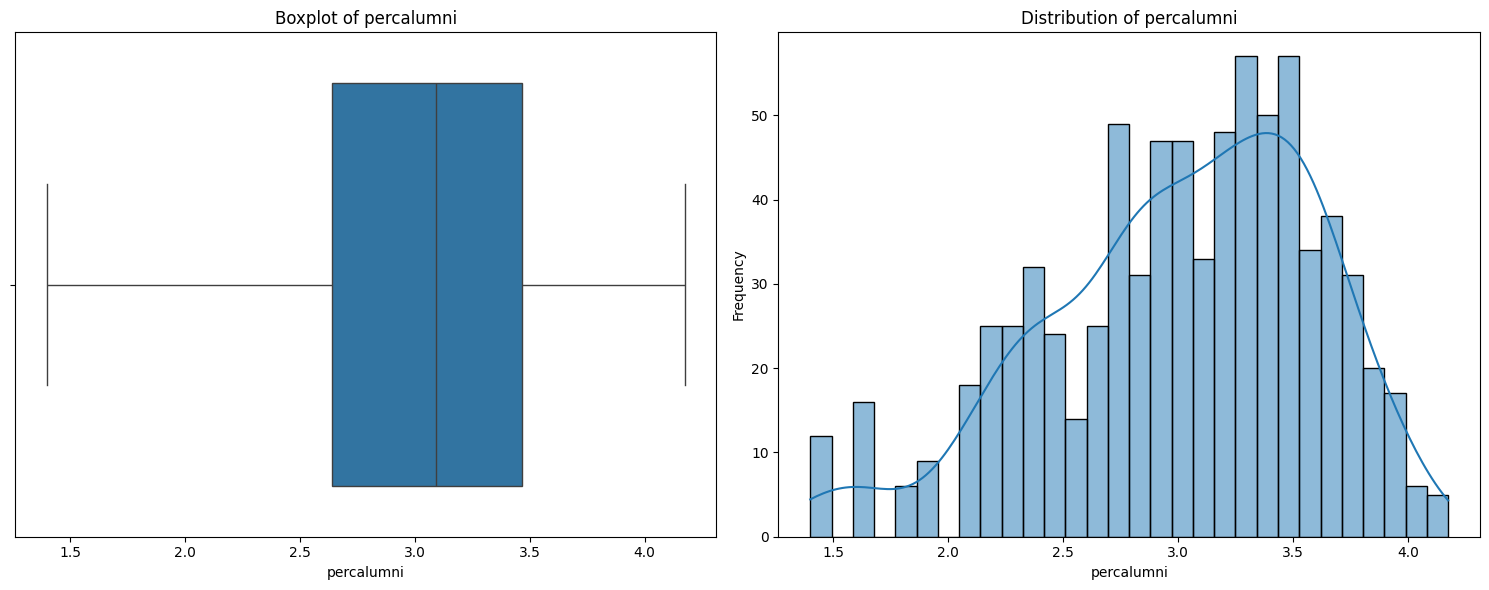

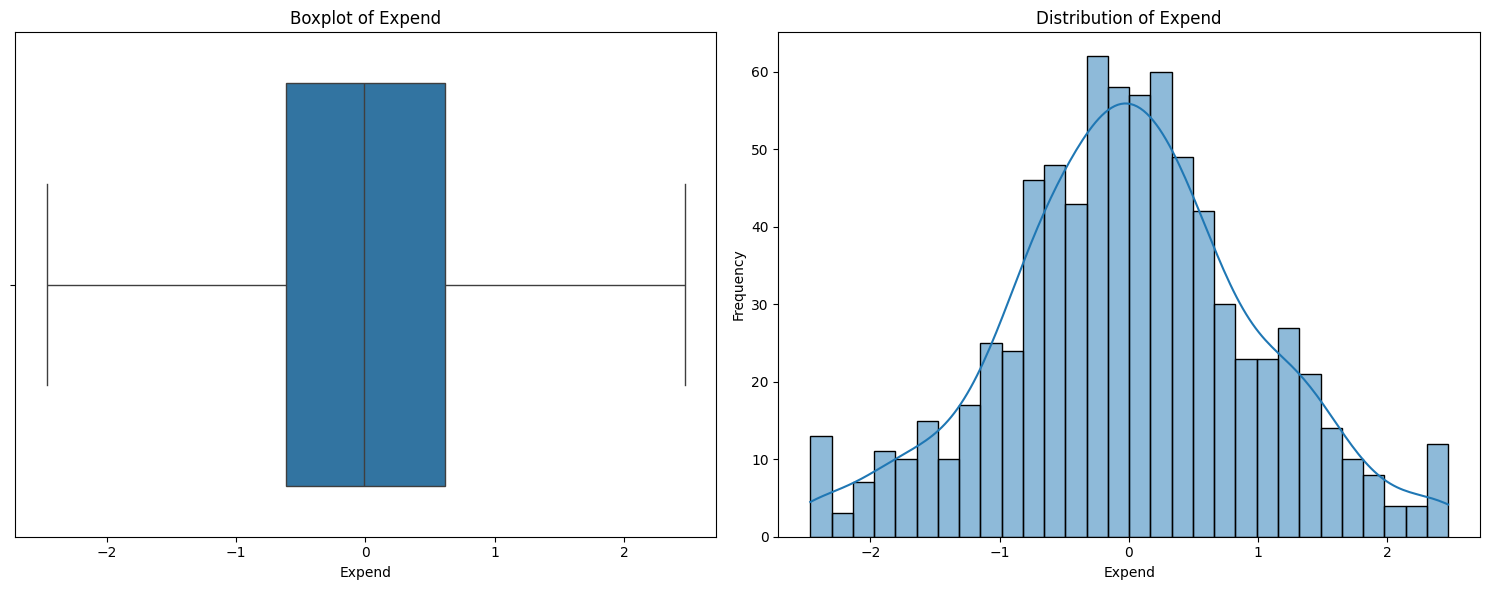

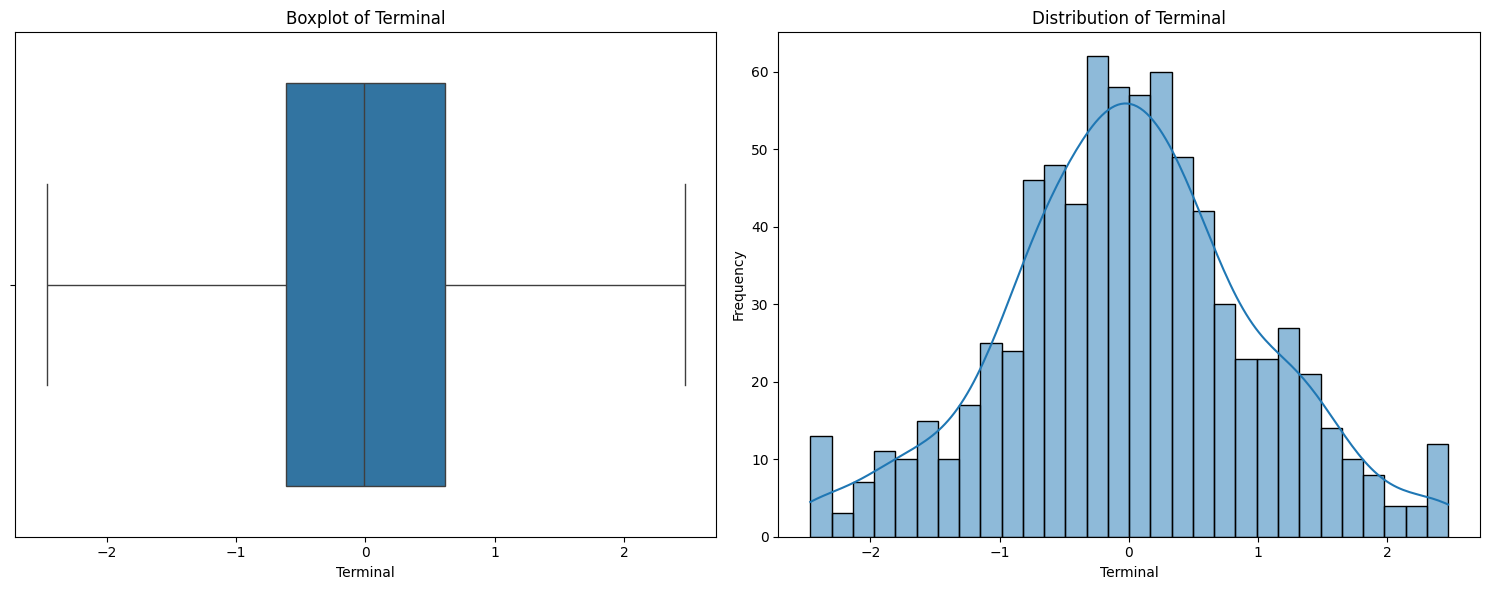

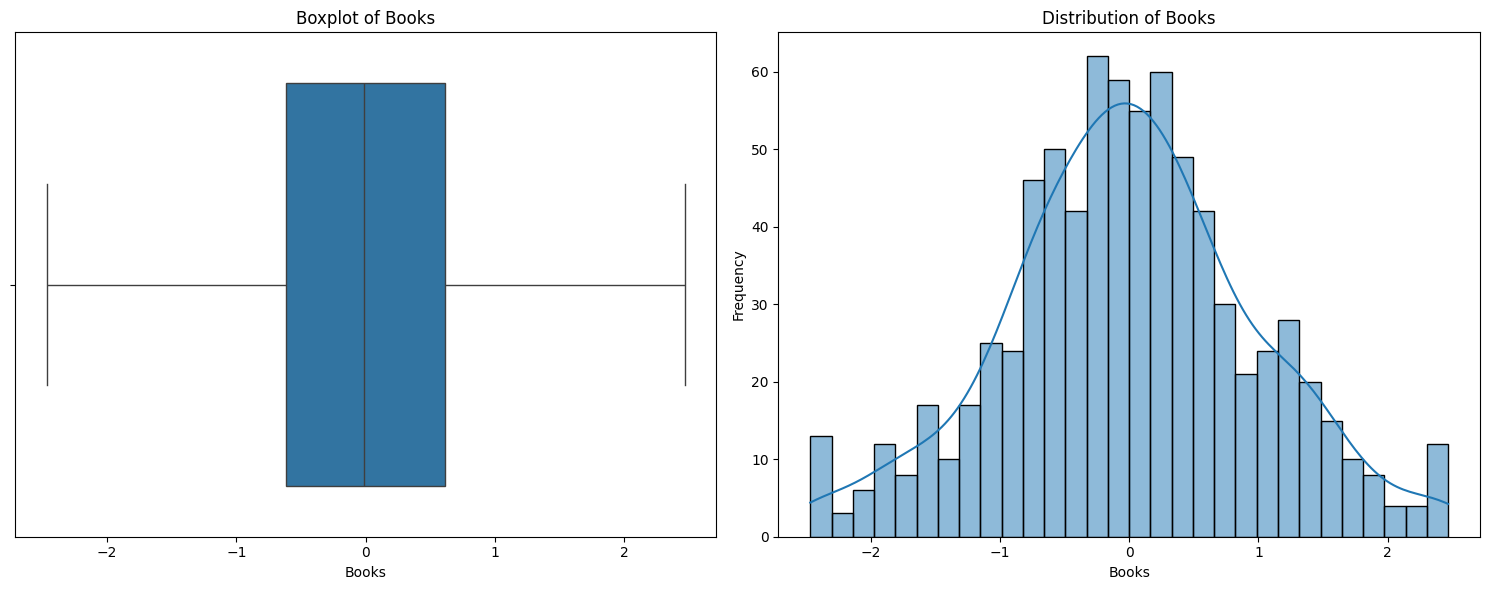

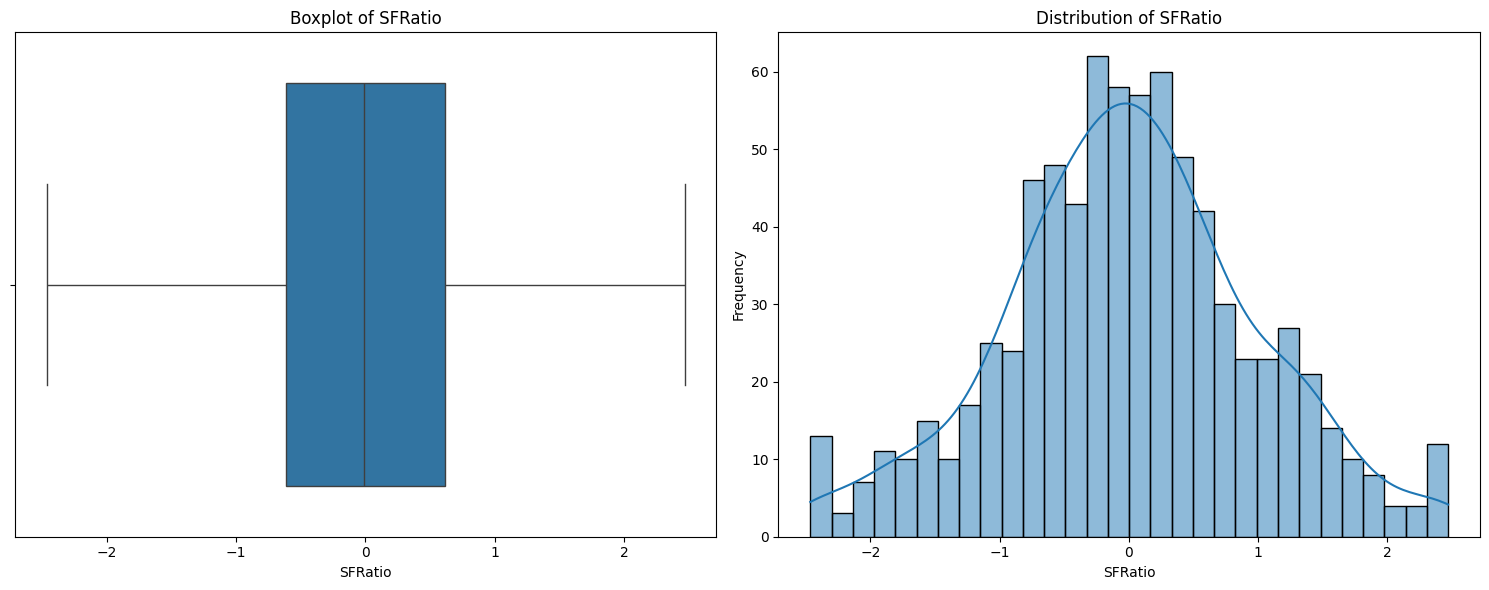

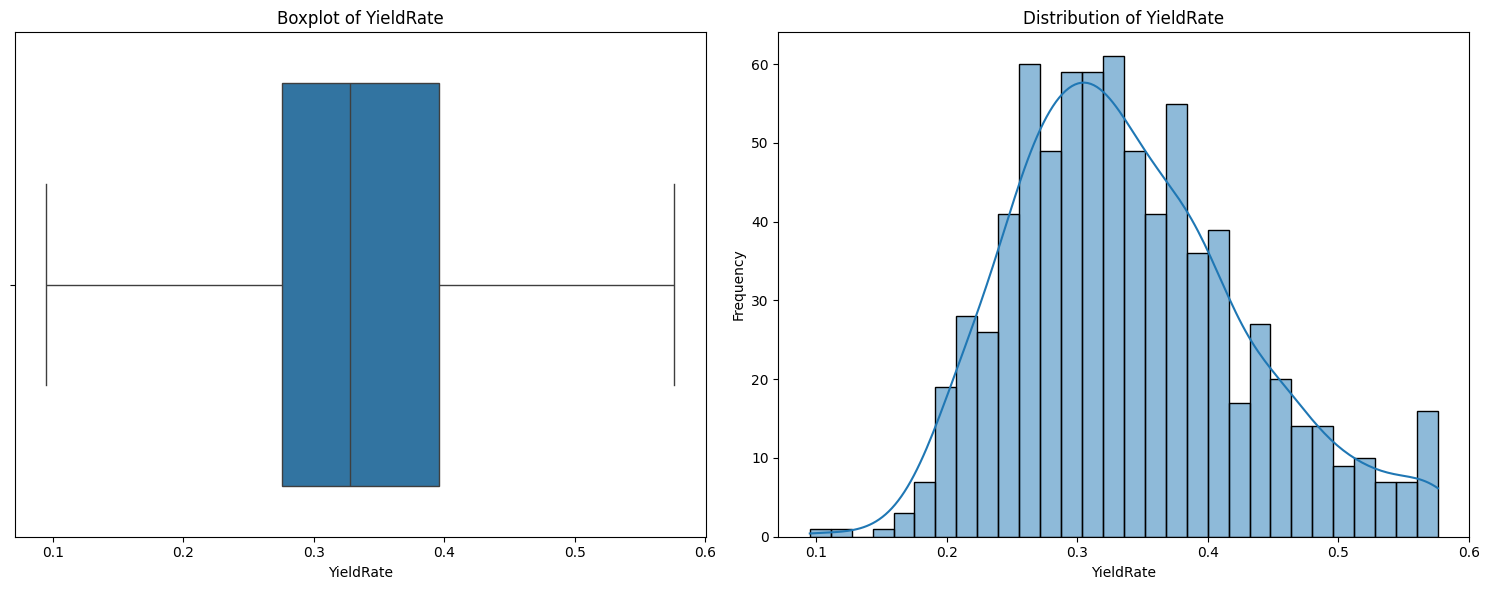

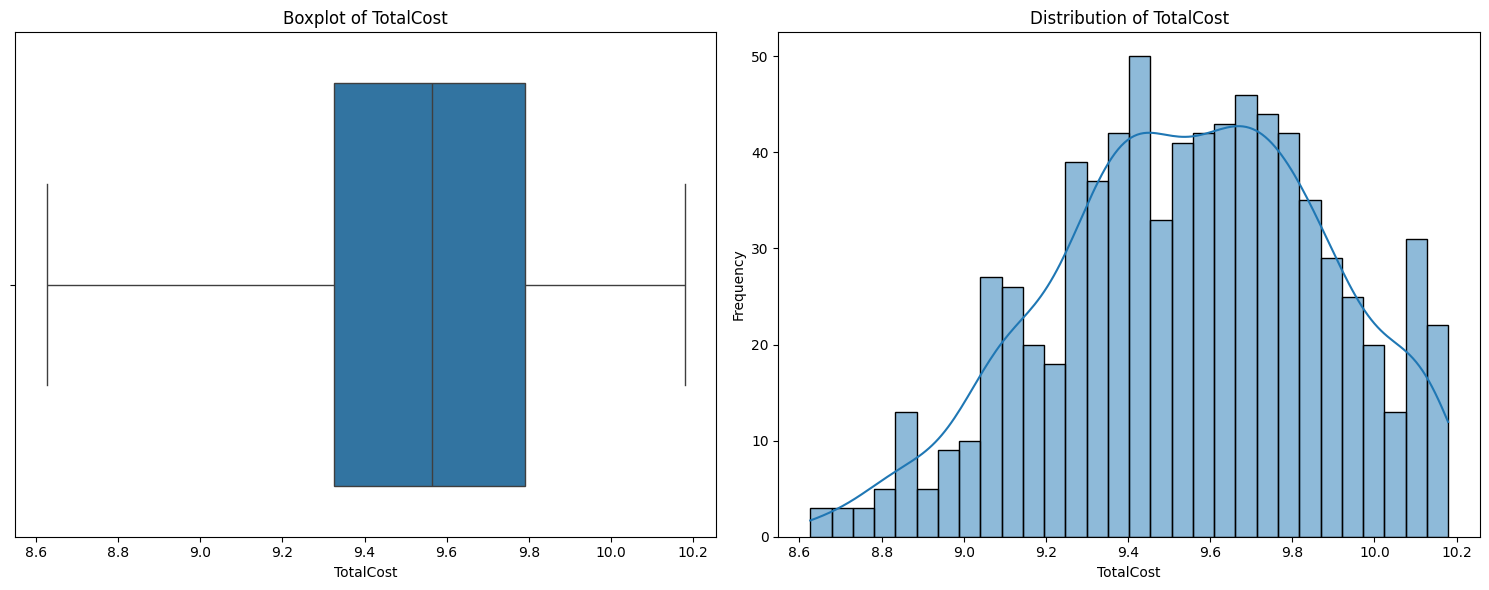

In [25]:
outlier_columns = ['Top10perc', 'Pundergrad', 'Personal', 'percalumni', 'Expend', 'Terminal', 'Books', 'SFRatio', 'YieldRate', 'TotalCost']

for col in outlier_columns:
    Q1= college[col].quantile(0.25)
    Q3= college[col].quantile(0.75)
    IQR=Q3-Q1
    upper_bound = Q3 + 1.5 * IQR
    lower_bound = Q1 - 1.5 * IQR
    median_value = college[col].median()

    college[col] = college[col].astype('float64').copy()

    college.loc[college[col] > upper_bound, col] = upper_bound
    college.loc[college[col] < lower_bound, col] = lower_bound

    fig, axes = plt.subplots(1, 2, figsize=(15, 6))

    sns.boxplot(x=college[col], ax=axes[0])
    axes[0].set_title(f'Boxplot of {col}')

    sns.histplot(college[col], kde=True, bins=30, ax=axes[1])
    axes[1].set_title(f'Distribution of {col}')
    axes[1].set_xlabel(col)
    axes[1].set_ylabel('Frequency')

    plt.tight_layout()
    plt.show()

**9. Encode Categorical Variable**

In [33]:
private_mapping = {'yes': 1, 'no': 0}
college['Private'] = college['Private'].map(private_mapping)
print(college[['Private']].head())

   Private
0        1
1        1
2        1
3        1
4        1


**6. Save Dataset**

In [37]:
college.to_csv('preprocessed_college_data.csv', index=False)